# Assignment 5

ch 9 - Ex - 1

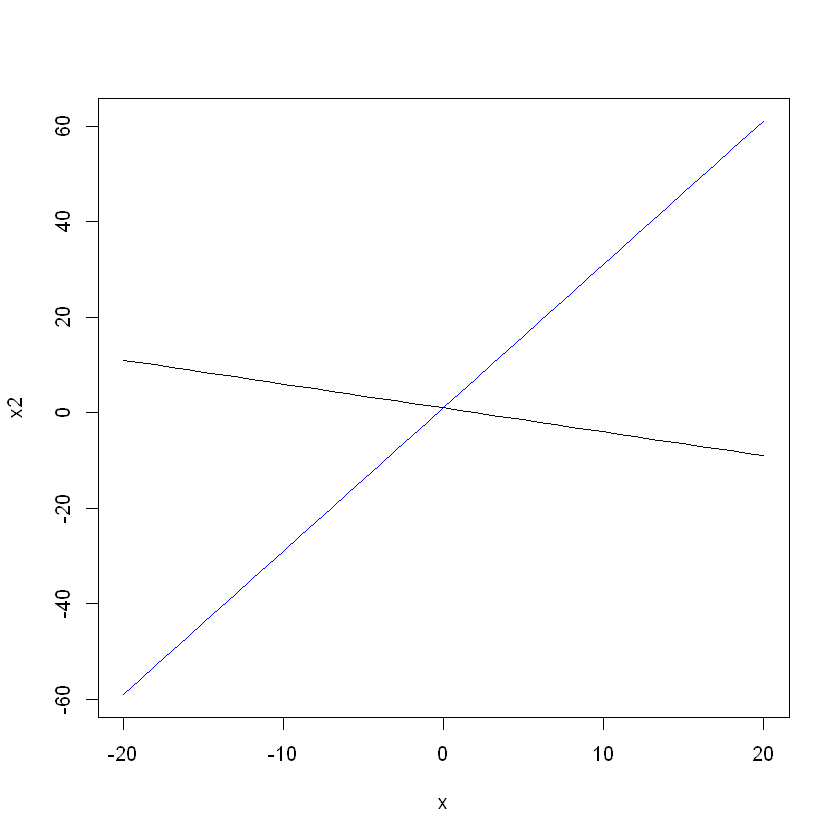

In [2]:
x = seq(-20,20)
x2 = 1 + 3*x
plot(x,x2, type="l",col="blue")
# 1 + 3*x - x2 > 0 for values under the blue line and <0 for values above the line
lines(x,1-x/2)
# -2 + x + 2*x2 > 0 for values above the black line and <0 for values under the line

a)

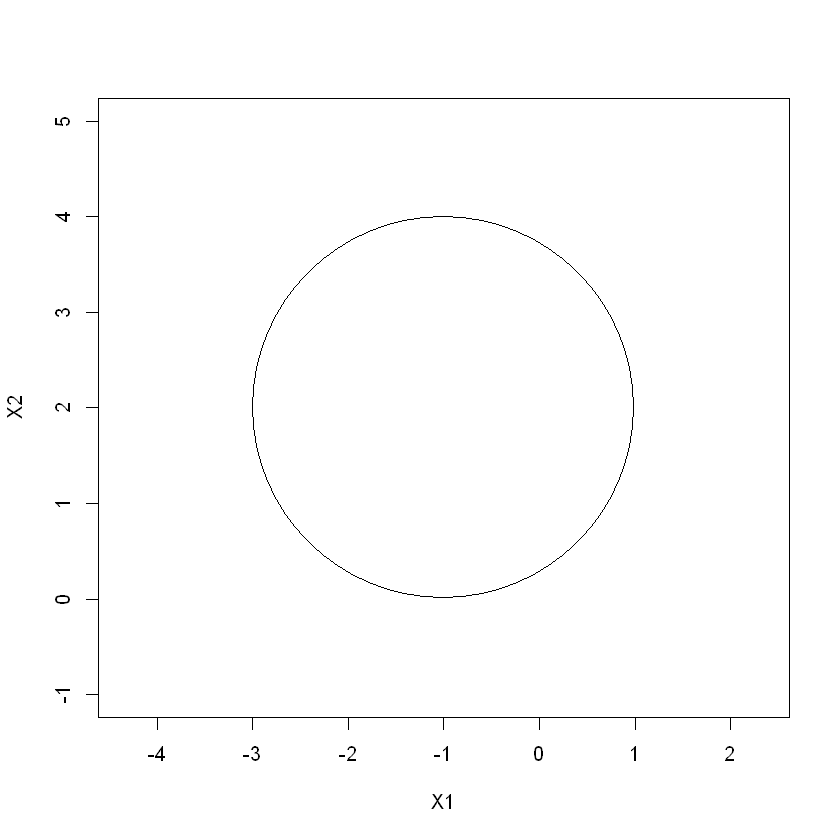

In [4]:
r <- 2
plot(NA, NA, type = "n", xlim = c(-4, 2), ylim = c(-1, 5), asp = 1, xlab = "X1", 
    ylab = "X2")
symbols(c(-1), c(2), circles = c(r), add = TRUE, inches = FALSE)

b)

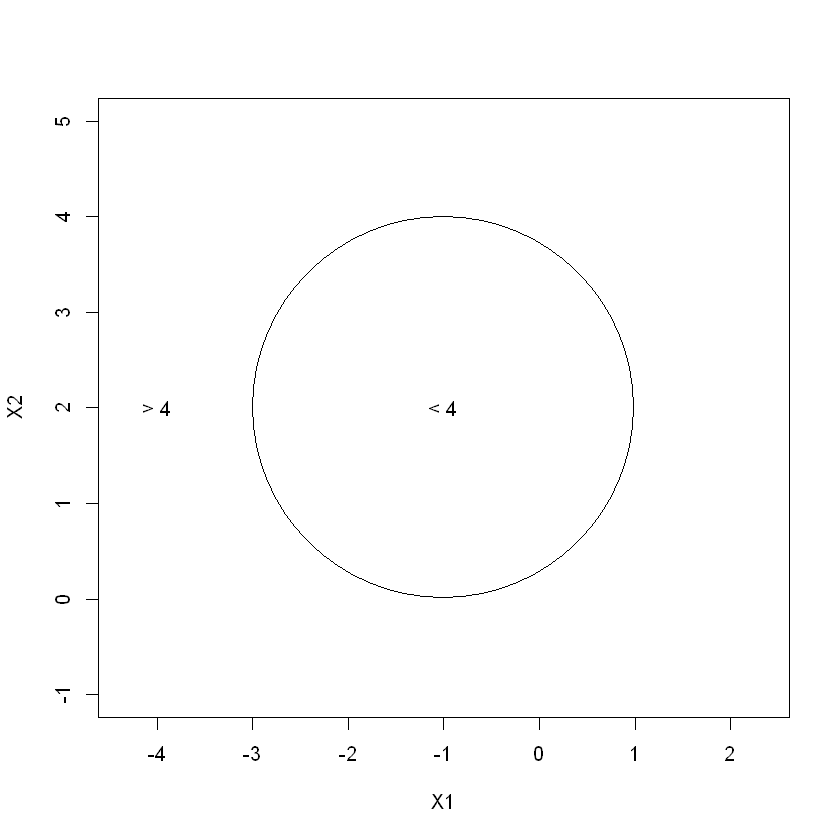

In [5]:
r <- 2
plot(NA, NA, type = "n", xlim = c(-4, 2), ylim = c(-1, 5), asp = 1, xlab = "X1", 
    ylab = "X2")
symbols(c(-1), c(2), circles = c(r), add = TRUE, inches = FALSE)
text(c(-1), c(2), "< 4")
text(c(-4), c(2), "> 4")

c)

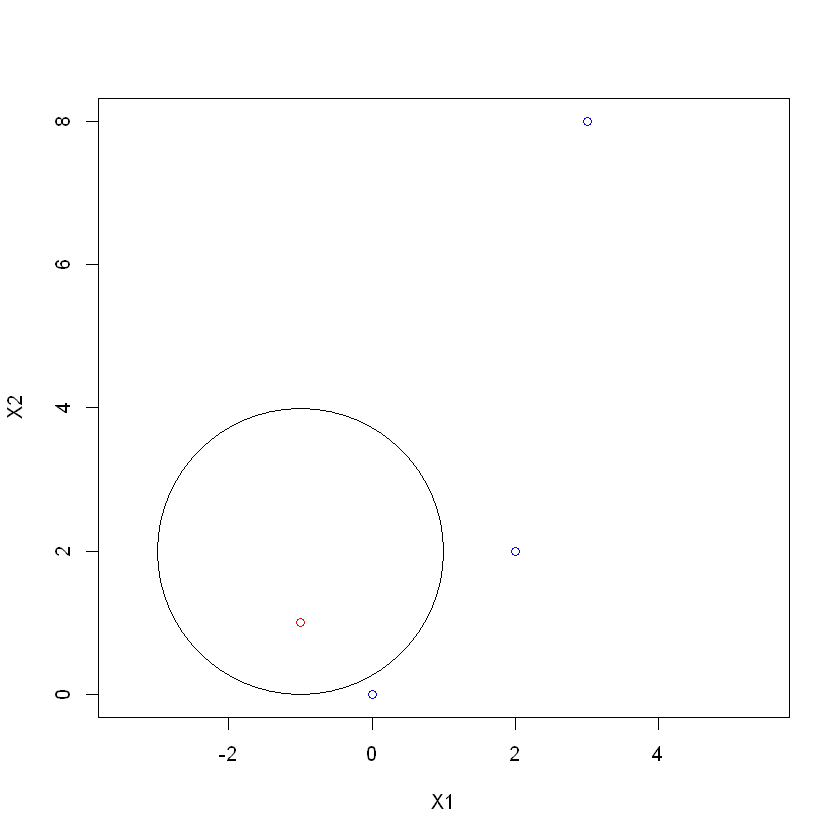

In [6]:
r <- 2
plot(c(0, -1, 2, 3), c(0, 1, 2, 8), col = c("blue", "red", "blue", "blue"), 
    type = "p", asp = 1, xlab = "X1", ylab = "X2")
symbols(c(-1), c(2), circles = c(r), add = TRUE, inches = FALSE)

Ex - 4

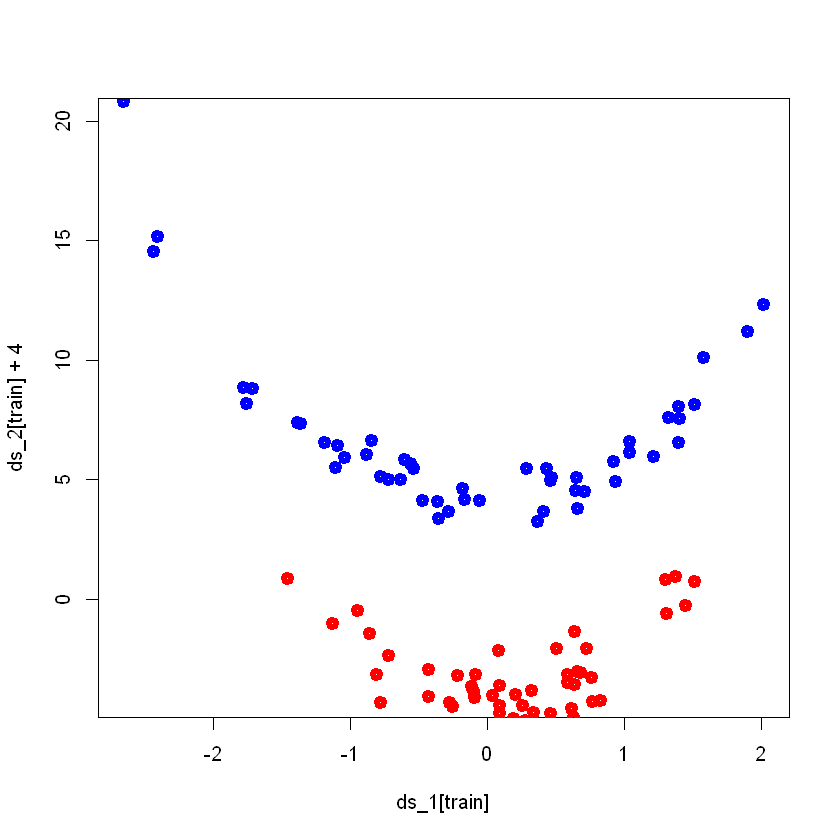

In [7]:
set.seed(42)
ds_1 = rnorm(100)
ds_2 = 2*ds_1^2 + rnorm(100)
train = sample(100,50)
plot(ds_1[train],ds_2[train]+4, lwd=5, col="blue", ylim=c(-4, 20))
points(ds_1[-train],ds_2[-train]-4,lwd=5, col="red")

In [8]:
set.seed(42)
t = rep(0, 100)
t[train] = 1
train = c(sample(train, 25), sample(setdiff(1:100, train), 25))
data.train = data.frame(x=ds_1[train], y=ds_2[train], t=as.factor(t[train]))
data.test = data.frame(x=ds_1[-train], y=ds_2[-train], t=as.factor(t[-train]))

In [9]:
install.packages("e1071")

also installing the dependency 'proxy'




  There are binary versions available but the source versions are later:
      binary source needs_compilation
proxy 0.4-25 0.4-26              TRUE
e1071  1.7-6  1.7-9              TRUE

  Binaries will be installed
package 'proxy' successfully unpacked and MD5 sums checked
package 'e1071' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ssripada1\AppData\Local\Temp\RtmpC8wQJ9\downloaded_packages


In [10]:
library(e1071)
svm.model = svm(t~., data=data.train, kernel="linear", cost=1)

Warning message:
"package 'e1071' was built under R version 3.6.3"

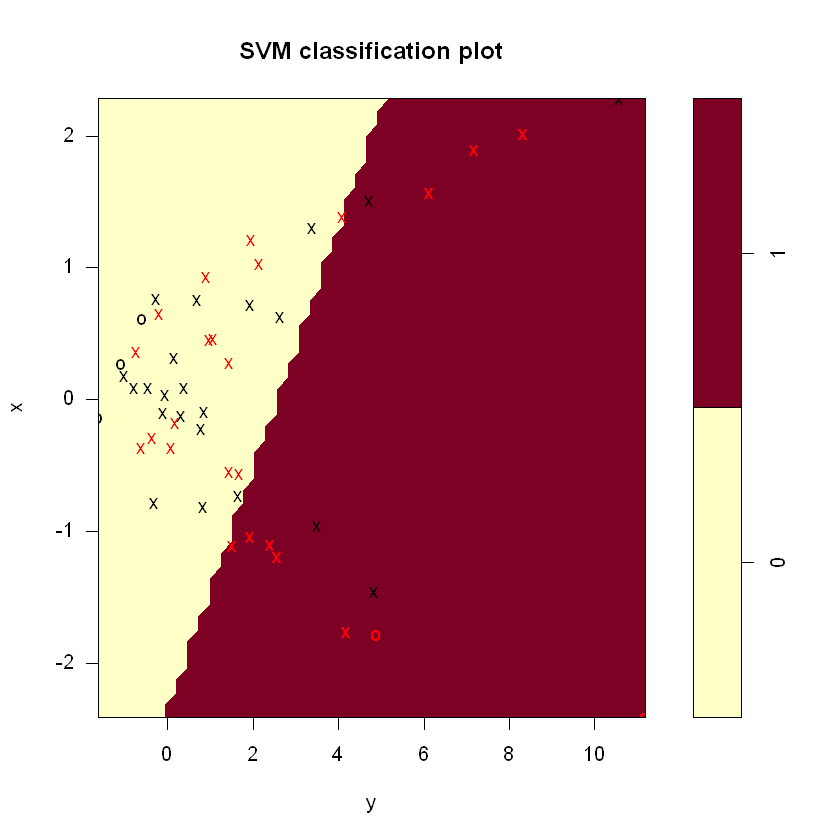

In [11]:
plot(svm.model, data.train)

In [12]:
table(t[train], predict(svm.model, data.train))

   
     0  1
  0 21  4
  1 14 11

In [13]:
svm.model = svm(t~., data=data.train, kernel="polynomial", cost=1)

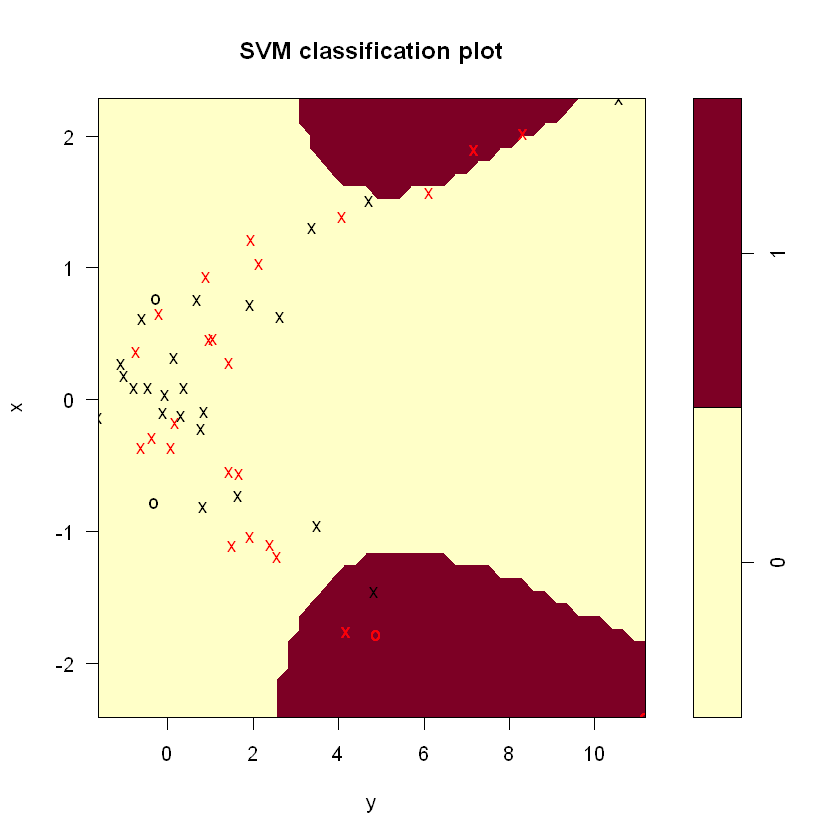

In [14]:
plot(svm.model, data.train)

In [15]:
table(t[train], predict(svm.model, data.train))

   
     0  1
  0 24  1
  1 19  6

In [16]:
svm.model = svm(t~., data=data.train, kernel="radial", gamma=1, cost=10)

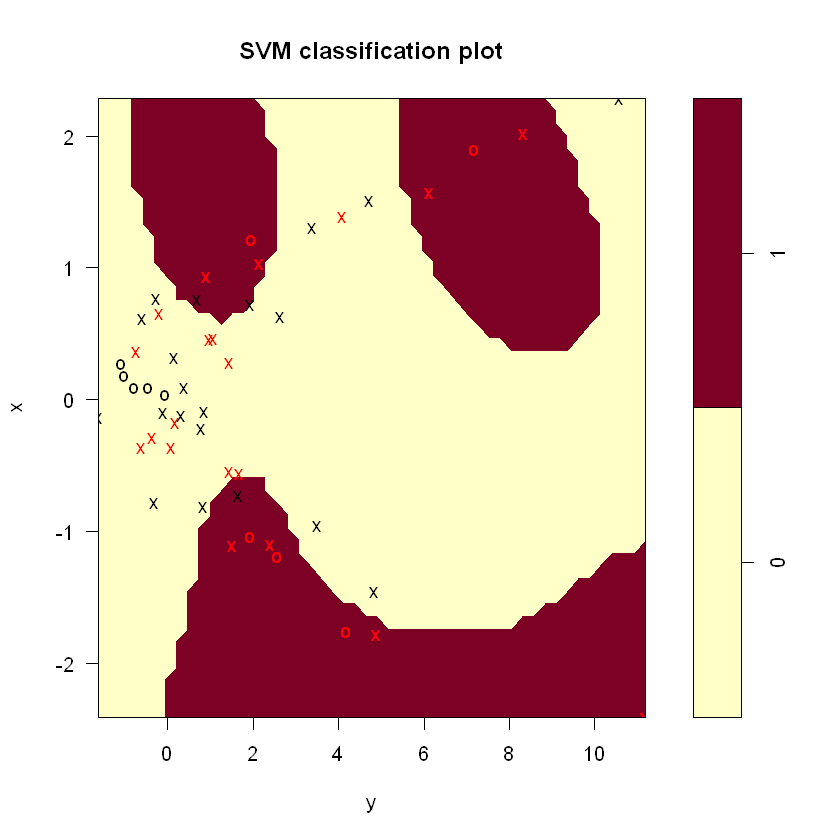

In [17]:
plot(svm.model, data.train)

In [18]:
table(t[train], predict(svm.model, data.train))

   
     0  1
  0 22  3
  1 11 14

In [19]:
table(t[-train], predict(svm.model, data.test))

   
     0  1
  0 20  5
  1 11 14

Ex - 8 

In [22]:
install.packages("ISLR")


  There is a binary version available but the source version is later:
     binary source needs_compilation
ISLR    1.2    1.4             FALSE



installing the source package 'ISLR'



In [23]:
library(ISLR)
set.seed(50)
train = sample(dim(OJ)[1], 800)
OJ.train = OJ[train, ]
OJ.test = OJ[-train, ]

In [24]:
svm.linear = svm(Purchase ~ ., kernel = "linear", data = OJ.train, cost = 0.01)
summary(svm.linear)


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "linear", cost = 0.01)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.01 

Number of Support Vectors:  435

 ( 219 216 )


Number of Classes:  2 

Levels: 
 CH MM




In [25]:
train.pred = predict(svm.linear, OJ.train)
table(OJ.train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 434  54
  MM  77 235

In [26]:
(80 + 51)/(432 + 51 + 80 + 237)

[1] 0.16375

In [27]:
## [1] 0.1688
test.pred = predict(svm.linear, OJ.test)
table(OJ.test$Purchase, test.pred)

    test.pred
      CH  MM
  CH 144  21
  MM  26  79

In [28]:
(22 + 24)/(146 + 24 + 22 + 78)

[1] 0.1703704

In [29]:
set.seed(50)
tune.out = tune(svm, Purchase ~ ., data = OJ.train, kernel = "linear", ranges = list(cost = 10^seq(-2, 
    1, by = 0.25)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
       cost
 0.05623413

- best performance: 0.17 

- Detailed performance results:
          cost   error dispersion
1   0.01000000 0.17250 0.03322900
2   0.01778279 0.17250 0.04440971
3   0.03162278 0.17500 0.04166667
4   0.05623413 0.17000 0.04609772
5   0.10000000 0.17625 0.04656611
6   0.17782794 0.17000 0.04495368
7   0.31622777 0.17375 0.04466309
8   0.56234133 0.17375 0.04693746
9   1.00000000 0.17375 0.04466309
10  1.77827941 0.17125 0.04825065
11  3.16227766 0.17125 0.03682259
12  5.62341325 0.17000 0.03961621
13 10.00000000 0.17000 0.04005205


In [30]:
svm.linear = svm(Purchase ~ ., kernel = "linear", data = OJ.train, cost = tune.out$best.parameters$cost)
train.pred = predict(svm.linear, OJ.train)
table(OJ.train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 426  62
  MM  70 242

In [31]:
(74 + 55)/(428 + 55 + 74 + 243)

[1] 0.16125

In [32]:
test.pred = predict(svm.linear, OJ.test)
table(OJ.test$Purchase, test.pred)

    test.pred
      CH  MM
  CH 144  21
  MM  26  79

In [33]:
(20 + 24)/(146 + 24 + 20 + 80)

[1] 0.162963

In [34]:
set.seed(410)
svm.radial = svm(Purchase ~ ., data = OJ.train, kernel = "radial")
summary(svm.radial)


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  371

 ( 185 186 )


Number of Classes:  2 

Levels: 
 CH MM




In [35]:
train.pred = predict(svm.radial, OJ.train)
table(OJ.train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 451  37
  MM  79 233

In [36]:
(74 + 42)/(441 + 42 + 74 + 243)

[1] 0.145

In [37]:
test.pred = predict(svm.radial, OJ.test)
table(OJ.test$Purchase, test.pred)

    test.pred
      CH  MM
  CH 142  23
  MM  26  79

In [38]:
(27 + 22)/(148 + 22 + 27 + 73)

[1] 0.1814815

In [54]:
set.seed(50)
tune.out = tune(svm, Purchase ~ ., data = OJ.train, kernel = "radial", ranges = list(cost = 10^seq(-2, 
    1, by = 0.25)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
      cost
 0.5623413

- best performance: 0.15875 

- Detailed performance results:
          cost   error dispersion
1   0.01000000 0.39000 0.05827378
2   0.01778279 0.39000 0.05827378
3   0.03162278 0.33875 0.07323146
4   0.05623413 0.20375 0.04528076
5   0.10000000 0.17125 0.03537988
6   0.17782794 0.17625 0.03087272
7   0.31622777 0.16125 0.03508422
8   0.56234133 0.15875 0.03175973
9   1.00000000 0.16375 0.03251602
10  1.77827941 0.16625 0.03283481
11  3.16227766 0.16875 0.03076005
12  5.62341325 0.17375 0.03356689
13 10.00000000 0.18000 0.03872983


In [40]:
svm.radial = svm(Purchase ~ ., data = OJ.train, kernel = "radial", cost = tune.out$best.parameters$cost)
train.pred = predict(svm.radial, OJ.train)
table(OJ.train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 448  40
  MM  78 234

In [41]:
(43 + 81)/(440 + 43 + 81 + 236)

[1] 0.155

In [42]:
test.pred = predict(svm.radial, OJ.test)
table(OJ.test$Purchase, test.pred)

    test.pred
      CH  MM
  CH 142  23
  MM  27  78

In [43]:
(28 + 25)/(145 + 25 + 28 + 72)

[1] 0.1962963

g)

In [44]:
set.seed(8112)
svm.poly = svm(Purchase ~ ., data = OJ.train, kernel = "poly", degree = 2)
summary(svm.poly)


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "poly", degree = 2)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  1 
     degree:  2 
     coef.0:  0 

Number of Support Vectors:  445

 ( 227 218 )


Number of Classes:  2 

Levels: 
 CH MM




In [45]:
train.pred = predict(svm.poly, OJ.train)
table(OJ.train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 461  27
  MM 106 206

In [46]:
(33 + 111)/(450 + 33 + 111 + 206)

[1] 0.18

In [47]:
test.pred = predict(svm.poly, OJ.test)
table(OJ.test$Purchase, test.pred)

    test.pred
      CH  MM
  CH 147  18
  MM  40  65

In [48]:
(34 + 21)/(149 + 21 + 34 + 66)

[1] 0.2037037

In [49]:
set.seed(50)
tune.out = tune(svm, Purchase ~ ., data = OJ.train, kernel = "poly", degree = 2, 
    ranges = list(cost = 10^seq(-2, 1, by = 0.25)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
     cost
 3.162278

- best performance: 0.17625 

- Detailed performance results:
          cost   error dispersion
1   0.01000000 0.38625 0.05935124
2   0.01778279 0.36750 0.05210833
3   0.03162278 0.34000 0.06146363
4   0.05623413 0.32250 0.05974483
5   0.10000000 0.31500 0.05974483
6   0.17782794 0.24375 0.04299952
7   0.31622777 0.20625 0.04903584
8   0.56234133 0.19500 0.05596378
9   1.00000000 0.18375 0.05744865
10  1.77827941 0.18625 0.04945888
11  3.16227766 0.17625 0.04581439
12  5.62341325 0.18125 0.04218428
13 10.00000000 0.18375 0.04168749


In [50]:
svm.poly = svm(Purchase ~ ., data = OJ.train, kernel = "poly", degree = 2, cost = tune.out$best.parameters$cost)
train.pred = predict(svm.poly, OJ.train)
table(OJ.train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 453  35
  MM  92 220

In [51]:
(85 + 36)/(447 + 36 + 85 + 232)

[1] 0.15125

In [52]:
test.pred = predict(svm.poly, OJ.test)
table(OJ.test$Purchase, test.pred)

    test.pred
      CH  MM
  CH 147  18
  MM  37  68

In [53]:
(28 + 22)/(148 + 22 + 28 + 72)

[1] 0.1851852